In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Read files

In [4]:
car_train=pd.read_csv("../data/train.csv")
car_test=pd.read_csv("../data/test.csv")

* [Version 1](#section-1)
* [Version 2](#section-2)
* [Version 3](#section-3)

In [ ]:
car_train.shape

In [ ]:
car_test.shape

In [ ]:
car_train.head()

In [ ]:
car_train.info()

In [ ]:
car_test.head()

In [ ]:
car_test.info()

In [ ]:
# Remove id column
car_train = car_train.drop('id', axis = 1)

In [ ]:
print("Valores únicos en el conjunto de entrenamiento:\n")
for i in car_train.columns:
    print(i, car_train[i].unique())

In [ ]:
print("Valores únicos en el conjunto de test:\n")
for i in car_test.columns:
    print(i, car_test[i].unique())

In [ ]:
# find the number of nulls in each colum
car_train.isnull().sum()

In [ ]:
# find the number of nulls in each colum
car_test.isnull().sum()

In [ ]:
car_train.info()

In [ ]:
car_train.nunique()

In [ ]:
car_test.info()

In [ ]:
car_test.nunique()

In [ ]:
car_train.describe()

In [ ]:
print("There is {} duplicated values in data frame".format(car_train.duplicated().sum()))

In [ ]:
car_test.describe()

## Variables continuas

In [ ]:
# Precio
plt.subplot(121)
sns.distplot(car_train['Precio_cat'],color="r");

plt.subplot(122)
car_train['Precio_cat'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# Kilometros
plt.subplot(121)
sns.distplot(car_train['Kilometros'],color="y");

plt.subplot(122)
car_train['Kilometros'].plot.box(figsize=(16,5))

plt.show()

## Variables Discretas

In [ ]:
sns.countplot(y='Ciudad',data=car_train)
print(car_train.Ciudad.value_counts(normalize=True)*100)

In [ ]:
sns.countplot(x='Mano',data=car_train)
print(car_train.Mano.value_counts(normalize=True)*100)

In [ ]:
sns.countplot(x='Asientos',data=car_train)
print(car_train.Asientos.value_counts())

In [ ]:
sns.countplot(y="Motor_CC", data=car_train, palette="Greens_d",
              order=car_train.Motor_CC.value_counts().iloc[:10].index)

<a id="section-1"></a>
# Versión 1 
Eliminar la mayoría de los duplicados, excepto el descuento que lo rellenamos por la moda, probar Regresión Logística, Lineal y Random Forest

In [ ]:
car_train_1 = car_train.copy()
car_test_1 = car_test.copy()

In [ ]:
car_train_1.head()

In [ ]:
car_train_1.columns

In [ ]:
print("Shape of train data Before dropping any Row: ",car_train_1.shape)
for i in car_train_1.columns:
    if car_train_1[i].isnull().sum() > 0:
        if i == "Descuento":
            car_train_1[i]=car_train_1[i].fillna((car_train_1[i].mode()[0]))
            print("Fill values in " + i + " with the mode: ",car_train[i].mode()[0])
        else:
            car_train_1 = car_train_1[car_train_1[i].notna()]
            print("Shape after dropping nulls in " + i + ":",car_train_1.shape)

In [ ]:
car_test_1['Descuento']=car_test_1['Descuento'].fillna((car_test_1['Descuento'].mode()[0]))

In [ ]:
car_train_1.isnull().sum()

In [ ]:
car_test_1.isnull().sum()

In [ ]:
car_train_1_orig = car_train_1.copy()
car_test_1_orig = car_test_1.copy()

In [ ]:
for i in list(car_train_1.columns):
    if car_train_1[i].dtypes == "object":
        to_read = "../data/" + i.lower() + ".csv"
        label = LabelEncoder().fit(pd.read_csv(to_read)[i])
        car_train_1[i] = label.transform(car_train_1_orig[i])
        car_test_1[i] = label.transform(car_test_1_orig[i])

In [ ]:
correcto = True

for asientos in car_train_1_orig.Asientos.unique():
    label_train = car_train_1.Asientos[car_train_1_orig.Asientos == asientos].unique()
    label_test = car_test_1.Asientos[car_test_1_orig.Asientos == asientos].unique()
    
    if len(label_train)==0 or len(label_test)==0:
        continue
    
    if label_train != label_test:
        print("Error, {} es etiquetado en train como {} y en test como {}".format(asientos, label_train, label_test))
        correcto = False
        break
        
if correcto:
    print("Todo perfecto")

## Modelos

In [ ]:
y = car_train_1['Precio_cat']
x = car_train_1.drop(['Precio_cat'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [ ]:
linear_r = LinearRegression()

In [ ]:
linear_score = cross_val_score(linear_r, x_train, y_train, cv=5)

In [ ]:
print(linear_score.mean(), linear_score.std())

In [ ]:
linear_r.fit(x_train,y_train)
linear_pred=linear_r.predict(x_test)
print(linear_pred)
linear_score=r2_score(y_test,linear_pred)

In [ ]:
print(linear_score)

In [ ]:
rfg = RandomForestRegressor()

In [ ]:
rfg_score = cross_val_score(rfg, x_train, y_train, cv=5)

In [ ]:
print(rfg_score.mean(), rfg_score.std())

In [ ]:
rfg.fit(X_train, y_train)
y_pred= rfg.predict(X_test)
print("Accuracy on Training set: ",rfg.score(X_train,y_train))
print("Accuracy on Testing set: ",rfg.score(X_test,y_test))

In [ ]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', r2_score(y_test, y_pred))

Generar fichero

In [ ]:
# Ahora predecimos
tests_ids_1 = car_test_1['id']
del car_test_1['id']
predict_1 = rfg.predict(car_test_1)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_1, 'Precio_cat': np.around(predict_1).astype(int) })
df_result.to_csv("mis_resultados_1.csv", index=False)

In [ ]:
df_result.head()

<a id="section-2"></a>
# Versión 2
Hacer un poco de EDA, dummy variables, drop nan directamente, manipular el dataset, escalar variables, vemos que tenemos bastante skewed data

In [5]:
car_train_2 = car_train.copy()
car_test_2 = car_test.copy()

In [6]:
#since the discount column is missing in both train and test set lets remove that column
car_train_2=car_train_2.drop('Descuento',axis=1)

In [7]:
car_train_2 = car_train_2.dropna()

In [8]:
car_train_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,3


In [9]:
car_train_2.shape

(3946, 13)

In [10]:
car_train_2.Consumo.values

array(['23.4 kmpl', '20.51 kmpl', '25.32 kmpl', ..., '22.9 kmpl',
       '20.14 kmpl', '20.77 kmpl'], dtype=object)

In [11]:
car_train_2.Motor_CC.values

array(['1248 CC', '998 CC', '1198 CC', ..., '1248 CC', '1197 CC',
       '1248 CC'], dtype=object)

In [12]:
car_train_2.Potencia.values

array(['74 bhp', '67.04 bhp', '77 bhp', ..., '74 bhp', '81.86 bhp',
       '88.8 bhp'], dtype=object)

For visualisation we can add new column to the dataset based of Consumo column, we can convert object datatype to numberic

In [13]:
car_train_2['Consumo']=car_train_2.Consumo.astype(str).str.partition()[0].astype('float')
car_train_2['Motor_CC']=car_train_2.Motor_CC.astype(str).str.partition()[0].astype('int')
car_train_2['Potencia']=car_train_2.Potencia.astype(str).str.partition()[0].astype('float')
car_train_2['Asientos']=car_train_2.Asientos.astype('int')

In [14]:
car_train_2.Consumo.values

array([23.4 , 20.51, 25.32, ..., 22.9 , 20.14, 20.77])

In [15]:
car_train_2.Potencia.values

array([74.  , 67.04, 77.  , ..., 74.  , 81.86, 88.8 ])

In [16]:
car_train_2.Motor_CC.values

array([1248,  998, 1198, ..., 1248, 1197, 1248])

In [17]:
car_train_2.Asientos.values

array([5, 5, 6, ..., 5, 5, 7])

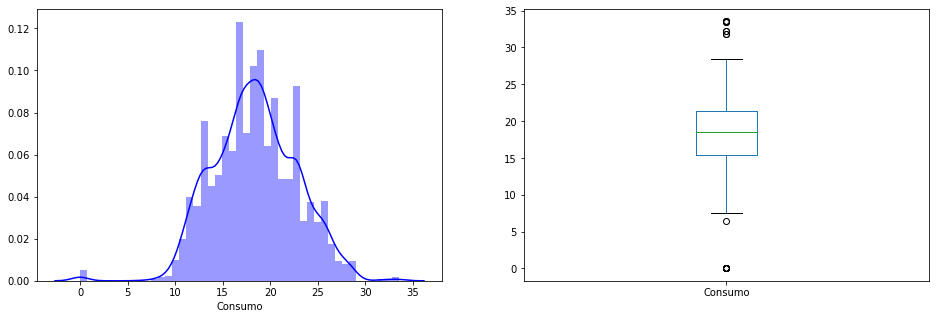

In [18]:
# Consumo
plt.subplot(121)
sns.distplot(car_train_2['Consumo'],color="b");

plt.subplot(122)
car_train_2['Consumo'].plot.box(figsize=(16,5))

plt.show()

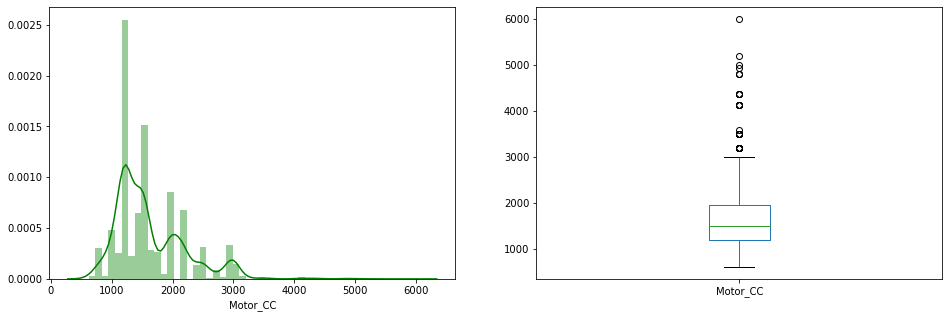

In [19]:
# Motor CC
plt.subplot(121)
sns.distplot(car_train_2['Motor_CC'],color="g");

plt.subplot(122)
car_train_2['Motor_CC'].plot.box(figsize=(16,5))

plt.show() 

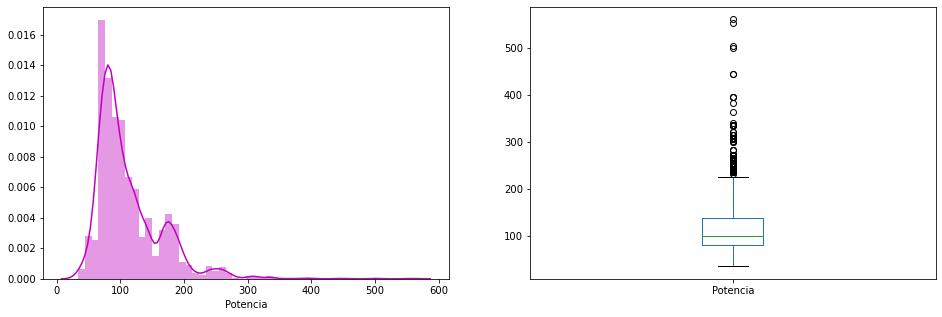

In [20]:
# Potencia
plt.subplot(121)
sns.distplot(car_train_2['Potencia'],color="m");

plt.subplot(122)
car_train_2['Potencia'].plot.box(figsize=(16,5))

plt.show() 

In [21]:
# Consumo vs Precio
car_train_2.loc[car_train_2.Consumo == 0.0]

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
455,456.0,Mercedes-Benz C-Class Progressive C 220d,E,2019.0,15369.0,Diesel,Automatic,First,0.0,1950,194.0,5,5
496,497.0,Mercedes-Benz M-Class ML 350 4Matic,E,2016.0,22769.0,Diesel,Automatic,First,0.0,2987,165.0,5,5
957,958.0,Mercedes-Benz M-Class ML 350 4Matic,E,2016.0,27833.0,Diesel,Automatic,First,0.0,2987,165.0,5,5
1077,1078.0,Hyundai Santro Xing GL,B,2008.0,65000.0,Petrol,Manual,Second,0.0,1086,62.0,5,1
1136,1137.0,Hyundai Santro Xing GL,I,2009.0,60170.0,Petrol,Manual,First,0.0,1086,62.0,5,1
1390,1391.0,Mercedes-Benz M-Class ML 350 4Matic,D,2012.0,63000.0,Diesel,Automatic,First,0.0,2987,165.0,5,5
1638,1639.0,Skoda Superb 3.6 V6 FSI,F,2009.0,53000.0,Petrol,Automatic,First,0.0,3597,262.6,5,3
2605,2606.0,Land Rover Freelander 2 TD4 SE,G,2012.0,119203.0,Diesel,Automatic,First,0.0,2179,115.0,5,5
2632,2633.0,Land Rover Freelander 2 TD4 HSE,J,2013.0,72000.0,Diesel,Automatic,First,0.0,2179,115.0,5,5
2934,2935.0,Hyundai Santro Xing GL,H,2011.0,20842.0,Petrol,Manual,First,0.0,1086,62.0,5,2


Outliers

In [80]:
features_ch = ['Kilometros','Precio_cat','Potencia','Consumo','Motor_CC']

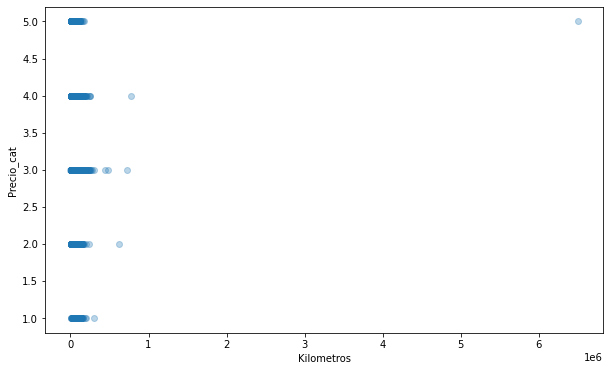

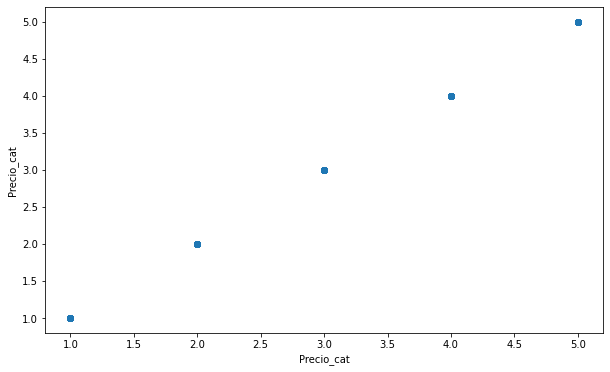

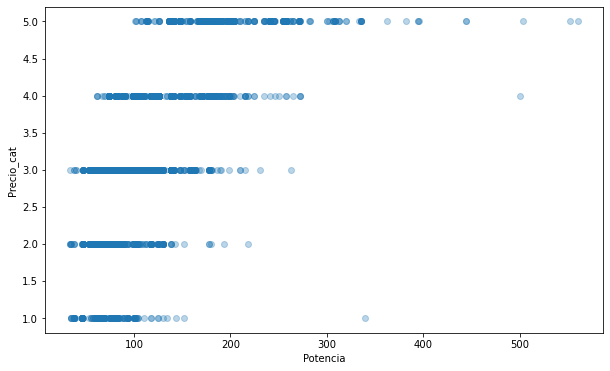

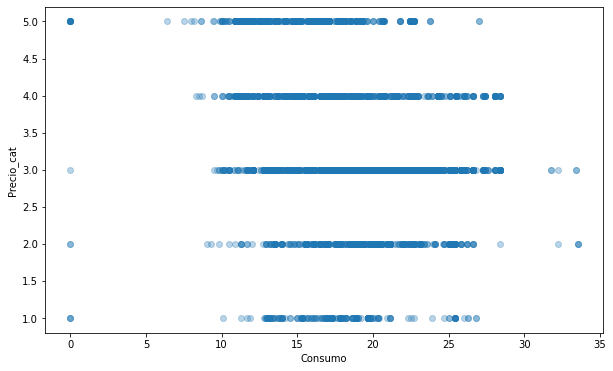

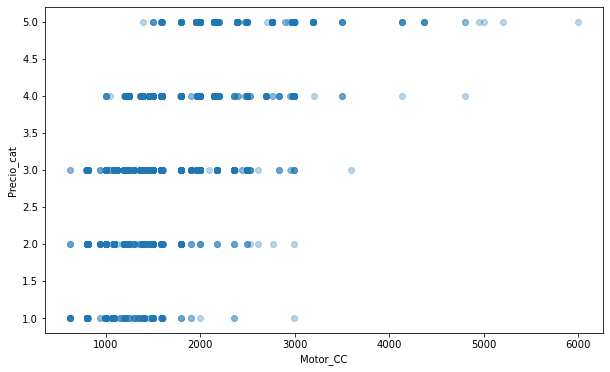

In [81]:
for feature in features_ch:
        plt.figure(figsize=(10,6))
    
        data=car_train_2.copy()
        plt.scatter(data[feature],data['Precio_cat'],alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel('Precio_cat')
        plt.show()

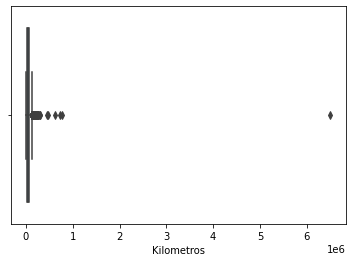

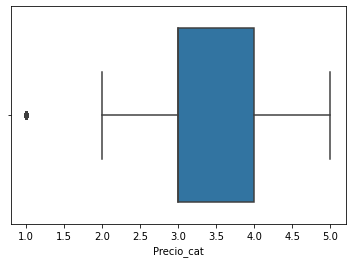

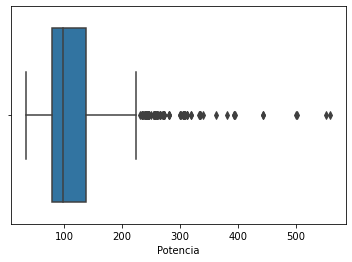

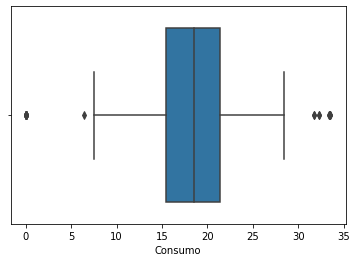

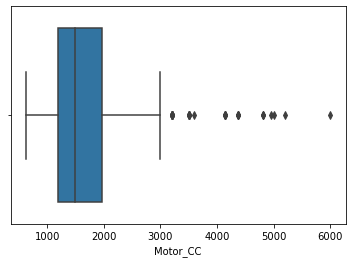

In [82]:
for i in features_ch:
    fig, ax = plt.subplots()
    #plt.xlim(-10,10)
    sns.boxplot(x = i, data = car_train_2, ax = ax)

Tenemos un dataset muy pequeño intentaré eliminar lo menos posible

In [22]:
part = car_train_2['Nombre'].astype(str).str.partition()
car_train_2['Company'] = part[0].str.title()
car_train_2['Car_name'] = part[2]

In [23]:
car_train_2 = car_train_2[car_train_2.Company != 'Bentley']

In [24]:
car_train_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Company,Car_name
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.40,1248,74.00,5,3,Maruti,Swift Dzire ZDI
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51,998,67.04,5,3,Maruti,Wagon R LXI Optional
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32,1198,77.00,6,3,Mahindra,KUV 100 mFALCON D75 K8
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.50,1197,80.00,5,3,Hyundai,i20 1.2 Magna
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.70,1199,88.70,5,3,Honda,Jazz 1.2 SV i VTEC


In [25]:
car_train_2.drop(['Nombre','Car_name'], axis = 1, inplace = True)

## Ordinal categorical data

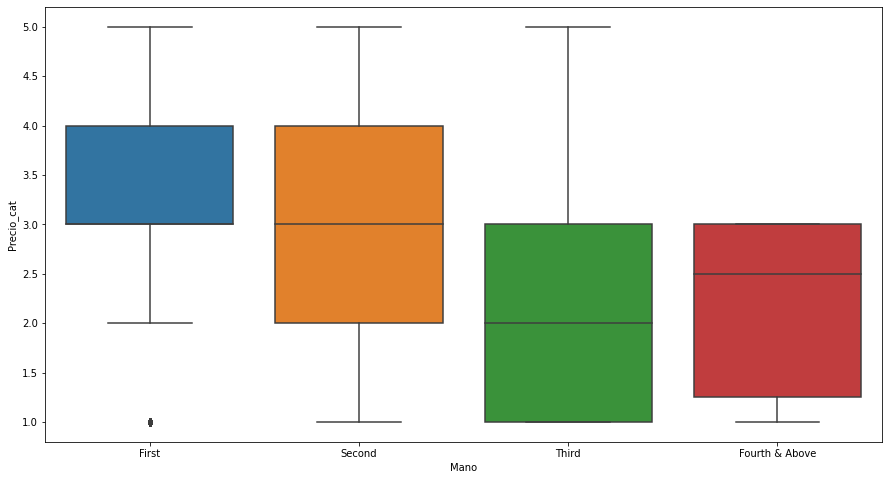

In [87]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(y = "Precio_cat", x = "Mano", data = car_train_2 )

In [26]:
car_train_2.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

## Dummy variables

In [27]:
tipo_marchas = car_train_2[['Tipo_marchas']]
tipo_marchas = pd.get_dummies(tipo_marchas, drop_first=True)

In [28]:
tipo_marchas.head()

,Tipo_marchas_Manual
0,1
1,1
2,1
3,1
4,1


In [29]:
ciudad = car_train_2[['Ciudad']]
ciudad = pd.get_dummies(ciudad, drop_first=True)

In [30]:
ciudad.head()

,Ciudad_C,Ciudad_D,Ciudad_E,Ciudad_F,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [31]:
company = car_train_2[['Company']]
company = pd.get_dummies(company, drop_first=True)

In [32]:
company.head()

,Company_Bmw,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
combustible = car_train_2[['Combustible']]
combustible = pd.get_dummies(combustible, drop_first=True)

In [34]:
combustible.head()

,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [35]:
car_train_2 = pd.concat([car_train_2, company , ciudad , tipo_marchas, combustible], axis = 1)

In [36]:
car_train_2.head()

,id,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1.0,G,2012.0,83000.0,Diesel,Manual,1,23.40,1248,74.00,...,1,0,0,0,0,0,1,1,0,0
1,2.0,I,2016.0,4800.0,Petrol,Manual,1,20.51,998,67.04,...,0,0,1,0,0,0,1,0,0,1
2,3.0,F,2016.0,26000.0,Diesel,Manual,1,25.32,1198,77.00,...,0,0,0,0,0,0,1,1,0,0
3,4.0,E,2013.0,56127.0,Petrol,Manual,1,18.50,1197,80.00,...,0,0,0,0,0,0,1,0,0,1
4,5.0,H,2017.0,41981.0,Petrol,Manual,1,18.70,1199,88.70,...,0,1,0,0,0,0,1,0,0,1


In [37]:
car_train_2.drop(['id','Ciudad', 'Combustible', 'Tipo_marchas', 'Company'], axis = 1, inplace = True)

In [38]:
car_train_2.shape

(3945, 48)

## Test data

In [39]:
car_test_2 = car_test_2.drop('Descuento',axis=1)

In [40]:
car_test_2 = car_test_2.dropna()

In [41]:
car_test_2.shape

(1159, 12)

In [42]:
car_test_2['Consumo']=car_test_2.Consumo.astype(str).str.partition()[0].astype('float')
car_test_2['Motor_CC']=car_test_2.Motor_CC.astype(str).str.partition()[0].astype('int')
car_test_2['Potencia']=car_test_2.Potencia.astype(str).str.partition()[0].astype('float')
car_test_2['Asientos']=car_test_2.Asientos.astype('int')

In [44]:
car_test_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27,2143,170.00,5
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81,1086,68.05,5
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.00,1399,68.00,5
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85,1197,83.14,5
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.10,1197,85.80,5


In [45]:
part = car_test_2['Nombre'].str.partition()
car_test_2['Company'] = part[0].str.title()
car_test_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Company
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27,2143,170.00,5,Mercedes-Benz
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81,1086,68.05,5,Hyundai
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.00,1399,68.00,5,Ford
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85,1197,83.14,5,Maruti
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.10,1197,85.80,5,Maruti


In [46]:
car_test_2.Company.nunique()

27

In [47]:
car_test_2.Tipo_marchas.nunique()

2

In [48]:
car_test_2.Combustible.nunique()

4

In [49]:
car_test_2.Ciudad.nunique()

11

In [50]:
car_test_2.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [51]:
#as Transmission  is an nominal varible lets perform onehotencoding
tipo_marchas = car_test_2[["Tipo_marchas"]]
tipo_marchas = pd.get_dummies(tipo_marchas,drop_first=True)

# Location
ciudad = car_test_2[["Ciudad"]]
ciudad = pd.get_dummies(ciudad,drop_first=True)

#company
company = car_test_2[["Company"]]
company = pd.get_dummies(company ,drop_first=True)

#fuel_type
combustible = car_test_2[["Combustible"]]
combustible = pd.get_dummies(combustible,drop_first=True)

In [52]:
car_test_2 = pd.concat([car_test_2, company , ciudad , tipo_marchas, combustible ], axis = 1)

In [53]:
car_test_2.drop(['Tipo_marchas', 'Ciudad', 'Company', 'Combustible', 'Nombre'], axis = 1, inplace = True)

In [54]:
car_test_2.shape

(1159, 48)

In [55]:
car_test_2.head()

,id,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Company_Audi,Company_Bmw,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,4820,2015,77771,1,19.27,2143,170.00,5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,4821,2011,62000,1,19.81,1086,68.05,5,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4822,2010,129986,2,20.00,1399,68.00,5,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4823,2015,49900,1,20.85,1197,83.14,5,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4824,2010,75319,2,21.10,1197,85.80,5,0,0,...,0,0,0,1,0,0,1,0,0,1


## Feature Scaling

In [56]:
## Feature scaling
from sklearn.preprocessing import StandardScaler

In [57]:
car_train_2.head()

,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Company_Bmw,Company_Chevrolet,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,2012.0,83000.0,1,23.40,1248,74.00,5,3,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2016.0,4800.0,1,20.51,998,67.04,5,3,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2016.0,26000.0,1,25.32,1198,77.00,6,3,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2013.0,56127.0,1,18.50,1197,80.00,5,3,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2017.0,41981.0,1,18.70,1199,88.70,5,3,0,0,...,0,1,0,0,0,0,1,0,0,1


In [58]:
car_test_2.head()

,id,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Company_Audi,Company_Bmw,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,4820,2015,77771,1,19.27,2143,170.00,5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,4821,2011,62000,1,19.81,1086,68.05,5,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4822,2010,129986,2,20.00,1399,68.00,5,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4823,2015,49900,1,20.85,1197,83.14,5,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4824,2010,75319,2,21.10,1197,85.80,5,0,0,...,0,0,0,1,0,0,1,0,0,1


In [59]:
scaled_features_train = car_train_2.copy()
scaled_features_test = car_test_2.copy() 

In [60]:
col_names = ['Kilometros','Potencia','Consumo','Motor_CC']

In [61]:
features_train = scaled_features_train[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)

In [62]:
scaled_features_train[col_names] = features_train

In [63]:
scaled_features_train.head()

,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Company_Bmw,Company_Chevrolet,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,2012.0,0.221697,1,1.148874,-0.638762,-0.751974,5,3,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2016.0,-0.490385,1,0.485447,-1.067971,-0.887019,5,3,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2016.0,-0.297339,1,1.589628,-0.724604,-0.693764,6,3,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2013.0,-0.023006,1,0.024032,-0.726321,-0.635555,5,3,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2017.0,-0.151818,1,0.069944,-0.722887,-0.466748,5,3,0,0,...,0,1,0,0,0,0,1,0,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8532312880>,
      dtype=object)

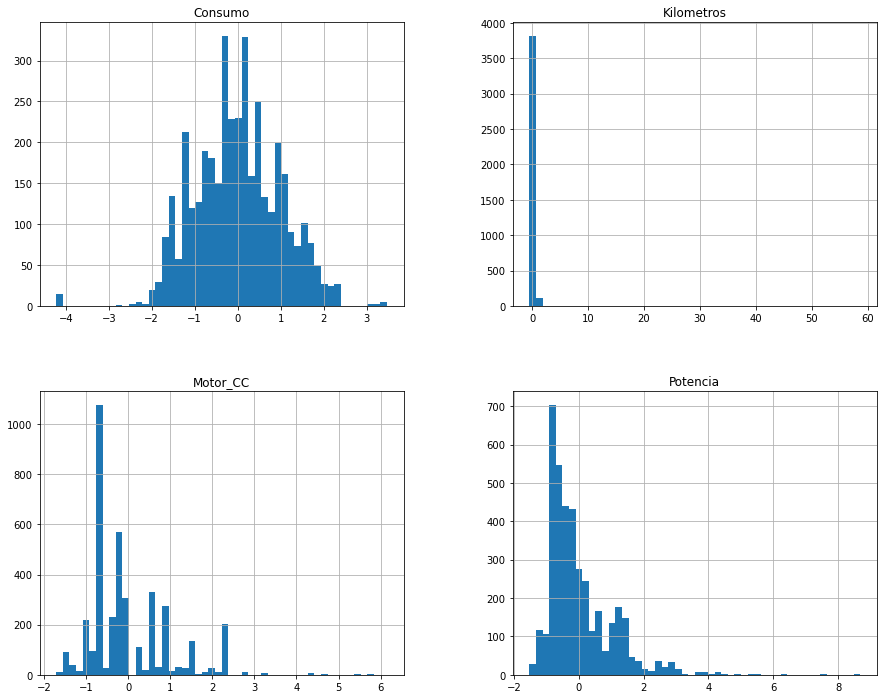

In [64]:
scaled_features_train[col_names].hist(bins=50,figsize=(15,12))

In [65]:
features_test = scaled_features_test[col_names]
scaler = StandardScaler().fit(features_test.values)
features_test = scaler.transform(features_test.values)

In [66]:
scaled_features_test[col_names] = features_test

In [67]:
scaled_features_test.head()

,id,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Company_Audi,Company_Bmw,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,4820,2015,0.515357,1,0.315477,0.782812,0.928945,5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,4821,2011,0.073480,1,0.437839,-0.859256,-0.772356,5,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4822,2010,1.978332,2,0.480893,-0.373005,-0.773190,5,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4823,2015,-0.265541,1,0.673499,-0.686816,-0.520540,5,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4824,2010,0.446656,2,0.730148,-0.686816,-0.476151,5,0,0,...,0,0,0,1,0,0,1,0,0,1


## Construimos modelo

In [68]:
y = scaled_features_train['Precio_cat']
X = scaled_features_train.drop('Precio_cat', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

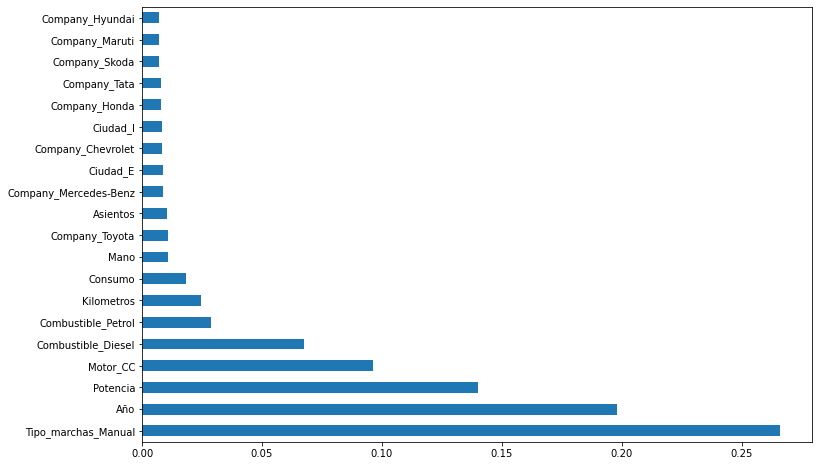

In [71]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [72]:
etr = ExtraTreesRegressor()
etr_score = cross_val_score(etr, X_train, y_train, cv=5)

In [73]:
print(etr_score.mean(), etr_score.std())

0.8514057323488794 0.010527553402545185


In [74]:
## RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf_score = cross_val_score(rnd_clf, X_train, y_train, cv=5)
print(rnd_clf_score.mean(), rnd_clf_score.std())

0.8212933057834662 0.007446576213527907


In [75]:
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print("Accuracy on Training set: ",rnd_clf.score(X_train,y_train))
print("Accuracy on Testing set: ",rnd_clf.score(X_test,y_test))

Accuracy on Training set:  1.0
Accuracy on Testing set:  0.8212927756653993


In [76]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('f1_score: ', f1_score(y_test, y_pred, average='micro'))
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

		Error Table
Mean Absolute Error      :  0.1850443599493029
Mean Squared  Error      :  0.20532319391634982
Root Mean Squared  Error :  0.45312602432033167
f1_score:  0.8212927756653993
accuracy_score:  0.8212927756653993
precision_score:  0.8212927756653993
recall_score:  0.8212927756653993


In [77]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [78]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [79]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [80]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [82]:
rfc_best = RandomForestClassifier(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
rfc_best_score = cross_val_score(rfc_best, X_train, y_train, cv=5)
print(rfc_best_score.mean(), rfc_best_score.std())

0.817175871130815 0.007209714349893766


In [83]:
rfc_best.fit(X_train, y_train)
y_pred= rfc_best.predict(X_test)
print("Accuracy on Training set: ",rfc_best.score(X_train,y_train))
print("Accuracy on Testing set: ",rfc_best.score(X_test,y_test))

Accuracy on Training set:  1.0
Accuracy on Testing set:  0.826362484157161


In [85]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('f1_score       : ', f1_score(y_test, y_pred, average='micro'))
print('accuracy_score : ', accuracy_score(y_test, y_pred))
print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score   : ', recall_score(y_test, y_pred, average='micro'))

		Error Table
Mean Absolute Error      :  0.17997465145754118
Mean Squared  Error      :  0.2002534854245881
Root Mean Squared  Error :  0.44749691107826445
f1_score       :  0.826362484157161
accuracy_score :  0.826362484157161
precision_score:  0.826362484157161
recall_score   :  0.826362484157161


## Generando el fichero para Kaggle

[4.552      1.98276876 2.192      ... 4.414      4.384      4.348     ]


<a id="section-3"></a>
# Versión 3


In [4]:
car_train_3 = car_train.copy()
car_test_3 = car_test.copy()

In [5]:
car_train_3.drop(['id'], axis = 1, inplace = True)

In [6]:
car_train_3.head()

,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


In [7]:
print("Shape of train data Before dropping any Row: ", car_train_3.shape)
for i in car_train_3.columns:
    if car_train_3[i].isnull().sum() > 0:
        if i != "Descuento":
            car_train_3 = car_train_3[car_train_3[i].notna()]
            print("Shape after dropping nulls in " + i + ":", car_train_3.shape)

Shape of train data Before dropping any Row:  (4819, 13)
Shape after dropping nulls in Nombre: (4747, 13)
Shape after dropping nulls in Ciudad: (4676, 13)
Shape after dropping nulls in Año: (4606, 13)
Shape after dropping nulls in Kilometros: (4540, 13)
Shape after dropping nulls in Combustible: (4475, 13)
Shape after dropping nulls in Tipo_marchas: (4410, 13)
Shape after dropping nulls in Mano: (4342, 13)
Shape after dropping nulls in Consumo: (4274, 13)
Shape after dropping nulls in Motor_CC: (4185, 13)
Shape after dropping nulls in Potencia: (4060, 13)
Shape after dropping nulls in Asientos: (4001, 13)


In [8]:
car_train_3 = car_train_3.reset_index(drop=True)

Well after using .notna() we have many absent indexes (Eg: If row no 47 was droped then after 46 we have 48 index), so I reset the index and droping the present index.

In [9]:
for i in range(car_train_3.shape[0]):
    car_train_3.at[i, 'Company'] = car_train_3['Nombre'][i].split()[0].title()
    car_train_3.at[i, 'Consumo(km/kg)'] = car_train_3['Consumo'][i].split()[0]
    car_train_3.at[i, 'Motor_CC(CC)'] = car_train_3['Motor_CC'][i].split()[0]
    car_train_3.at[i, 'Potencia(bhp)'] = car_train_3['Potencia'][i].split()[0]

In [10]:
car_train_3.head()

,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat,Company,Consumo(km/kg),Motor_CC(CC),Potencia(bhp)
0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3,Maruti,23.4,1248,74
1,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3,Maruti,20.51,998,67.04
2,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3,Mahindra,25.32,1198,77
3,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3,Hyundai,18.5,1197,80
4,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3,Honda,18.7,1199,88.7


In [11]:
car_train_3['Consumo(km/kg)'] = car_train_3['Consumo(km/kg)'].astype(float)
car_train_3['Motor_CC(CC)'] = car_train_3['Motor_CC(CC)'].astype(float)
car_train_3['Potencia(bhp)'] = car_train_3['Potencia(bhp)'].astype(float)

In [12]:
car_train_3.shape

(4001, 17)

In [13]:
car_train_3['Descuento'] = car_train_3['Descuento'].astype(float)

In [14]:
# Drop useless features
car_train_3.drop(["Nombre"],axis=1,inplace=True)
car_train_3.drop(["Consumo"],axis=1,inplace=True)
car_train_3.drop(["Motor_CC"],axis=1,inplace=True)
car_train_3.drop(["Potencia"],axis=1,inplace=True)

## Categorical data

In [15]:
car_train_3["Ciudad"].value_counts()

B    538
F    496
E    451
H    449
C    385
J    361
I    339
D    313
G    257
K    254
L    158
Name: Ciudad, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

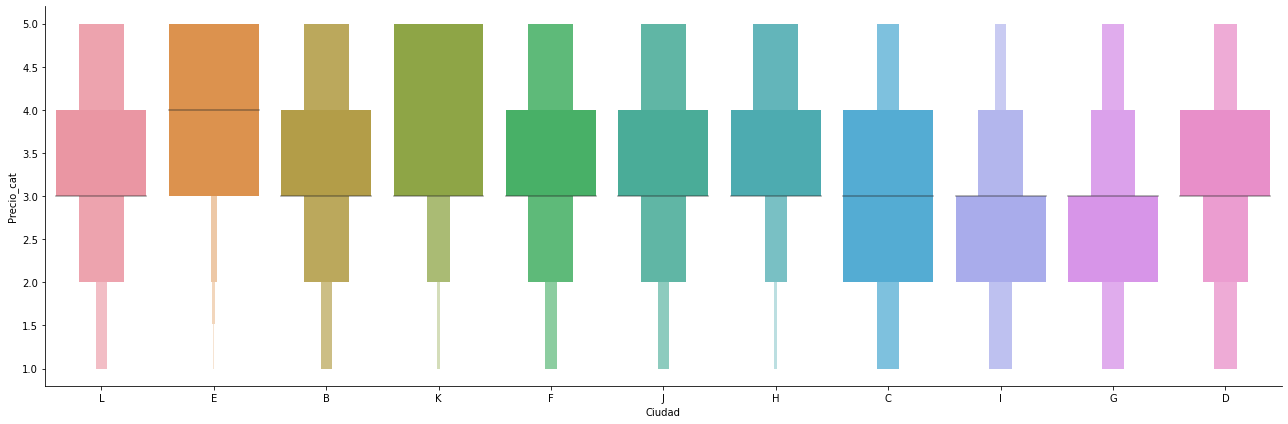

In [16]:
sns.catplot(y='Precio_cat',x = 'Ciudad', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [17]:
ciudad = car_train_3[['Ciudad']]
ciudad = pd.get_dummies(ciudad,drop_first=True)
ciudad.head()

,Ciudad_C,Ciudad_D,Ciudad_E,Ciudad_F,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [18]:
car_train_3["Combustible"].value_counts()

Diesel    2172
Petrol    1784
CNG         38
LPG          7
Name: Combustible, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

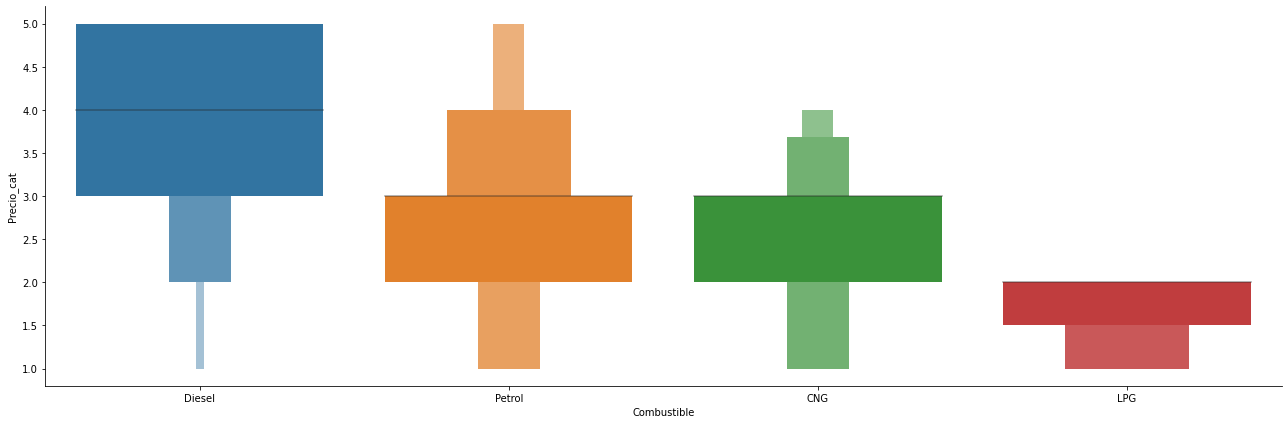

In [19]:
sns.catplot(y='Precio_cat',x = 'Combustible', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [20]:
combustible = car_train_3[['Combustible']]
combustible = pd.get_dummies(combustible,drop_first=True)
combustible.head()

,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [21]:
car_train_3["Tipo_marchas"].value_counts()

Manual       2852
Automatic    1149
Name: Tipo_marchas, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

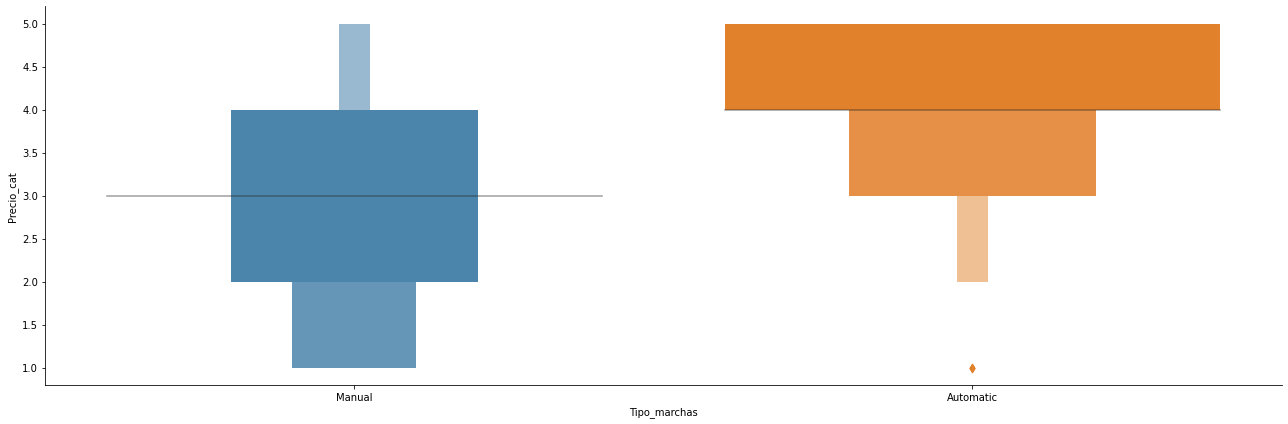

In [22]:
sns.catplot(y='Precio_cat',x = 'Tipo_marchas', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [23]:
tipo_marchas = car_train_3[['Tipo_marchas']]
tipo_marchas = pd.get_dummies(tipo_marchas,drop_first=True)
tipo_marchas.head()

,Tipo_marchas_Manual
0,1
1,1
2,1
3,1
4,1


In [24]:
car_train_3["Mano"].value_counts()

First             3372
Second             557
Third               66
Fourth & Above       6
Name: Mano, dtype: int64

In [25]:
car_train_3.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
car_train_3.head()

,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Asientos,Descuento,Precio_cat,Company,Consumo(km/kg),Motor_CC(CC),Potencia(bhp)
0,G,2012.0,83000.0,Diesel,Manual,1,5.0,NaN,3,Maruti,23.40,1248.0,74.00
1,I,2016.0,4800.0,Petrol,Manual,1,5.0,NaN,3,Maruti,20.51,998.0,67.04
2,F,2016.0,26000.0,Diesel,Manual,1,6.0,NaN,3,Mahindra,25.32,1198.0,77.00
3,E,2013.0,56127.0,Petrol,Manual,1,5.0,NaN,3,Hyundai,18.50,1197.0,80.00
4,H,2017.0,41981.0,Petrol,Manual,1,5.0,NaN,3,Honda,18.70,1199.0,88.70


In [26]:
car_train_3['Company'].value_counts()

Maruti           788
Hyundai          733
Honda            436
Toyota           272
Volkswagen       220
Mercedes-Benz    208
Ford             195
Mahindra         191
Bmw              174
Audi             152
Tata             121
Skoda            118
Renault          104
Chevrolet         74
Nissan            54
Land              37
Jaguar            27
Mitsubishi        19
Mini              18
Fiat              16
Porsche           11
Jeep              11
Volvo             10
Datsun             7
Isuzu              2
Force              1
Lamborghini        1
Bentley            1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

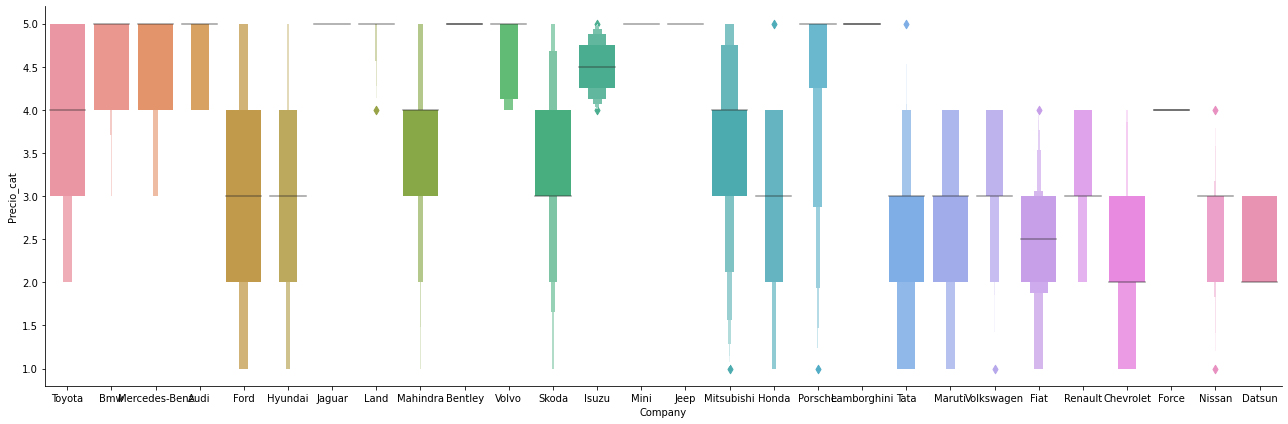

In [27]:
sns.catplot(y='Precio_cat',x = 'Company', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [28]:
# A lot of variation so let's drop them
car_train_3.drop(["Company"],axis=1,inplace=True)

In [29]:
final_car_train_3 = pd.concat([car_train_3, ciudad , combustible, tipo_marchas],axis=1)
final_car_train_3.head()

,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Asientos,Descuento,Precio_cat,Consumo(km/kg),...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Combustible_Diesel,Combustible_LPG,Combustible_Petrol,Tipo_marchas_Manual
0,G,2012.0,83000.0,Diesel,Manual,1,5.0,NaN,3,23.40,...,1,0,0,0,0,0,1,0,0,1
1,I,2016.0,4800.0,Petrol,Manual,1,5.0,NaN,3,20.51,...,0,0,1,0,0,0,0,0,1,1
2,F,2016.0,26000.0,Diesel,Manual,1,6.0,NaN,3,25.32,...,0,0,0,0,0,0,1,0,0,1
3,E,2013.0,56127.0,Petrol,Manual,1,5.0,NaN,3,18.50,...,0,0,0,0,0,0,0,0,1,1
4,H,2017.0,41981.0,Petrol,Manual,1,5.0,NaN,3,18.70,...,0,1,0,0,0,0,0,0,1,1


In [30]:
final_car_train_3.drop(["Ciudad", "Combustible", "Tipo_marchas", "Descuento"], axis = 1, inplace = True)

In [31]:
final_car_train_3.shape

(4001, 22)

In [73]:
final_car_train_3.head()

,Año,Kilometros,Mano,Asientos,Precio_cat,Consumo(km/kg),Motor_CC(CC),Potencia(bhp),Ciudad_C,Ciudad_D,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Combustible_Diesel,Combustible_LPG,Combustible_Petrol,Tipo_marchas_Manual
0,2012.0,83000.0,1,5.0,3,23.40,1248.0,74.00,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2016.0,4800.0,1,5.0,3,20.51,998.0,67.04,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2016.0,26000.0,1,6.0,3,25.32,1198.0,77.00,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2013.0,56127.0,1,5.0,3,18.50,1197.0,80.00,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2017.0,41981.0,1,5.0,3,18.70,1199.0,88.70,0,0,...,0,1,0,0,0,0,0,0,1,1


## Prepare test data

In [70]:
car_test_3.head()

,id,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Asientos,Company,Consumo(km/kg),Motor_CC(CC),Potencia(bhp)
0,4820,H,2015,77771,Diesel,Automatic,1,5.0,Mercedes-Benz,19.27,2143.0,170.00
1,4821,J,2011,62000,Petrol,Manual,1,5.0,Hyundai,19.81,1086.0,68.05
2,4822,C,2010,129986,Diesel,Manual,2,5.0,Ford,20.00,1399.0,68.00
3,4823,D,2015,49900,Petrol,Manual,1,5.0,Maruti,20.85,1197.0,83.14
4,4824,J,2010,75319,Petrol,Manual,2,5.0,Maruti,21.10,1197.0,85.80


In [34]:
car_test_3.isnull().sum()

id                 0
Nombre             0
Ciudad             0
Año                0
Kilometros         0
Combustible        0
Tipo_marchas       0
Mano               0
Consumo            0
Motor_CC           0
Potencia           0
Asientos           0
Descuento       1004
dtype: int64

In [35]:
car_test_3.shape

(1159, 13)

In [36]:
for i in range(car_test_3.shape[0]):
    car_test_3.at[i, 'Company'] = car_test_3['Nombre'][i].split()[0].title()
    car_test_3.at[i, 'Consumo(km/kg)'] = car_test_3['Consumo'][i].split()[0]
    car_test_3.at[i, 'Motor_CC(CC)'] = car_test_3['Motor_CC'][i].split()[0]
    car_test_3.at[i, 'Potencia(bhp)'] = car_test_3['Potencia'][i].split()[0]

In [37]:
car_test_3['Consumo(km/kg)'] = car_test_3['Consumo(km/kg)'].astype(float)
car_test_3['Motor_CC(CC)'] = car_test_3['Motor_CC(CC)'].astype(float)
car_test_3['Potencia(bhp)'] = car_test_3['Potencia(bhp)'].astype(float)

In [38]:
car_test_3.drop(["Potencia","Motor_CC","Consumo","Nombre","Descuento"],axis=1,inplace=True)

In [71]:
var = 'Ciudad'
Location = car_test_3[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Combustible'
Fuel_t = car_test_3[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Tipo_marchas'
Transmission = car_test_3[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

car_test_3.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
car_test_3.head()

final_car_test_3= pd.concat([car_test_3,Location,Fuel_t,Transmission],axis=1)
final_car_test_3.head()

final_car_test_3.drop(["Company","Ciudad","Combustible","Tipo_marchas"],axis=1,inplace=True)
final_car_test_3.head()

print("Final Test Size: ",final_car_test_3.shape)

Final Test Size:  (1159, 22)


In [72]:
final_car_test_3.head()

,id,Año,Kilometros,Mano,Asientos,Consumo(km/kg),Motor_CC(CC),Potencia(bhp),Ciudad_C,Ciudad_D,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Combustible_Diesel,Combustible_LPG,Combustible_Petrol,Tipo_marchas_Manual
0,4820,2015,77771,1,5.0,19.27,2143.0,170.00,0,0,...,0,1,0,0,0,0,1,0,0,0
1,4821,2011,62000,1,5.0,19.81,1086.0,68.05,0,0,...,0,0,0,1,0,0,0,0,1,1
2,4822,2010,129986,2,5.0,20.00,1399.0,68.00,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4823,2015,49900,1,5.0,20.85,1197.0,83.14,0,1,...,0,0,0,0,0,0,0,0,1,1
4,4824,2010,75319,2,5.0,21.10,1197.0,85.80,0,0,...,0,0,0,1,0,0,0,0,1,1


In [74]:
final_car_test_3.columns

Index(['id', 'Año', 'Kilometros', 'Mano', 'Asientos', 'Consumo(km/kg)',
       'Motor_CC(CC)', 'Potencia(bhp)', 'Ciudad_C', 'Ciudad_D', 'Ciudad_E',
       'Ciudad_F', 'Ciudad_G', 'Ciudad_H', 'Ciudad_I', 'Ciudad_J', 'Ciudad_K',
       'Ciudad_L', 'Combustible_Diesel', 'Combustible_LPG',
       'Combustible_Petrol', 'Tipo_marchas_Manual'],
      dtype='object')

## Final features selection

In [41]:
final_car_train_3.columns

Index(['Año', 'Kilometros', 'Mano', 'Asientos', 'Precio_cat', 'Consumo(km/kg)',
       'Motor_CC(CC)', 'Potencia(bhp)', 'Ciudad_C', 'Ciudad_D', 'Ciudad_E',
       'Ciudad_F', 'Ciudad_G', 'Ciudad_H', 'Ciudad_I', 'Ciudad_J', 'Ciudad_K',
       'Ciudad_L', 'Combustible_Diesel', 'Combustible_LPG',
       'Combustible_Petrol', 'Tipo_marchas_Manual'],
      dtype='object')

In [42]:
X = final_car_train_3.drop('Precio_cat', axis=1)

In [43]:
X.shape

(4001, 21)

In [44]:
y = final_car_train_3['Precio_cat']
y.head()

0    3
1    3
2    3
3    3
4    3
Name: Precio_cat, dtype: int64

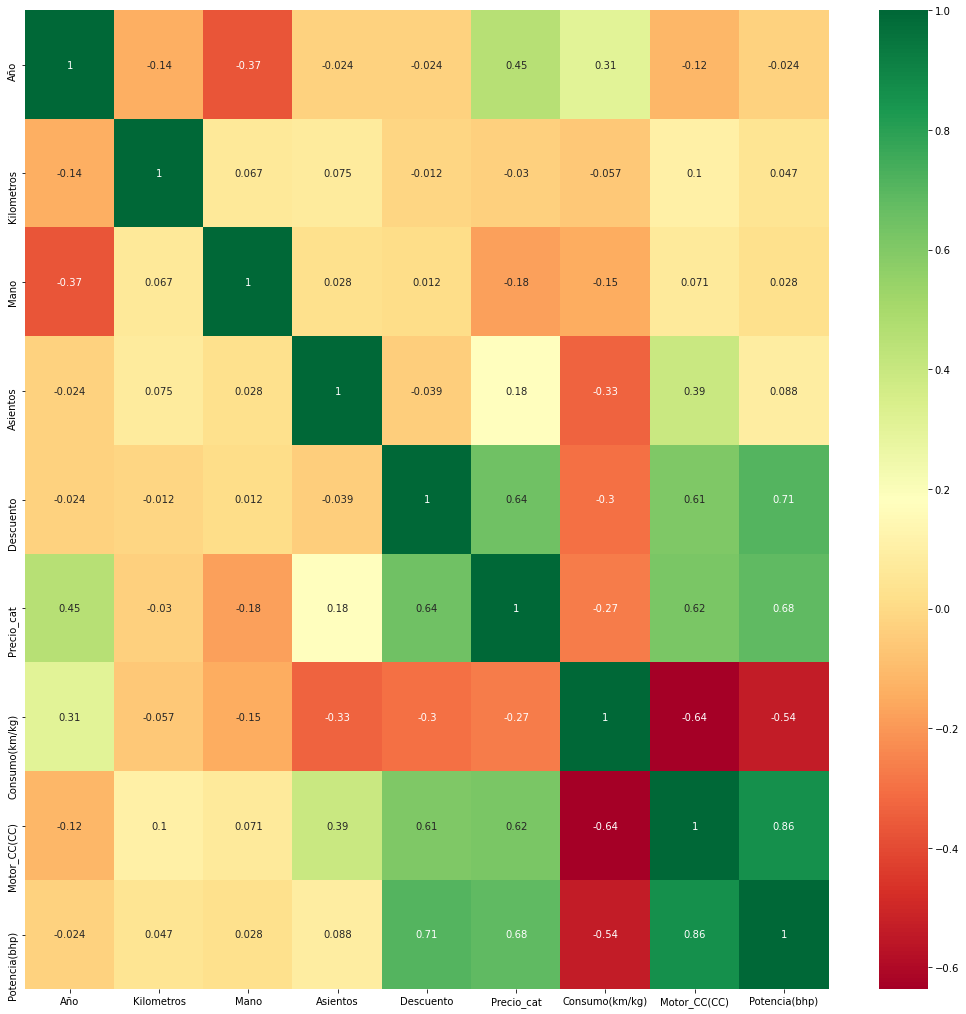

In [45]:
plt.figure(figsize=(18,18))
sns.heatmap(car_train_3.corr(),annot=True,cmap='RdYlGn')

plt.show()

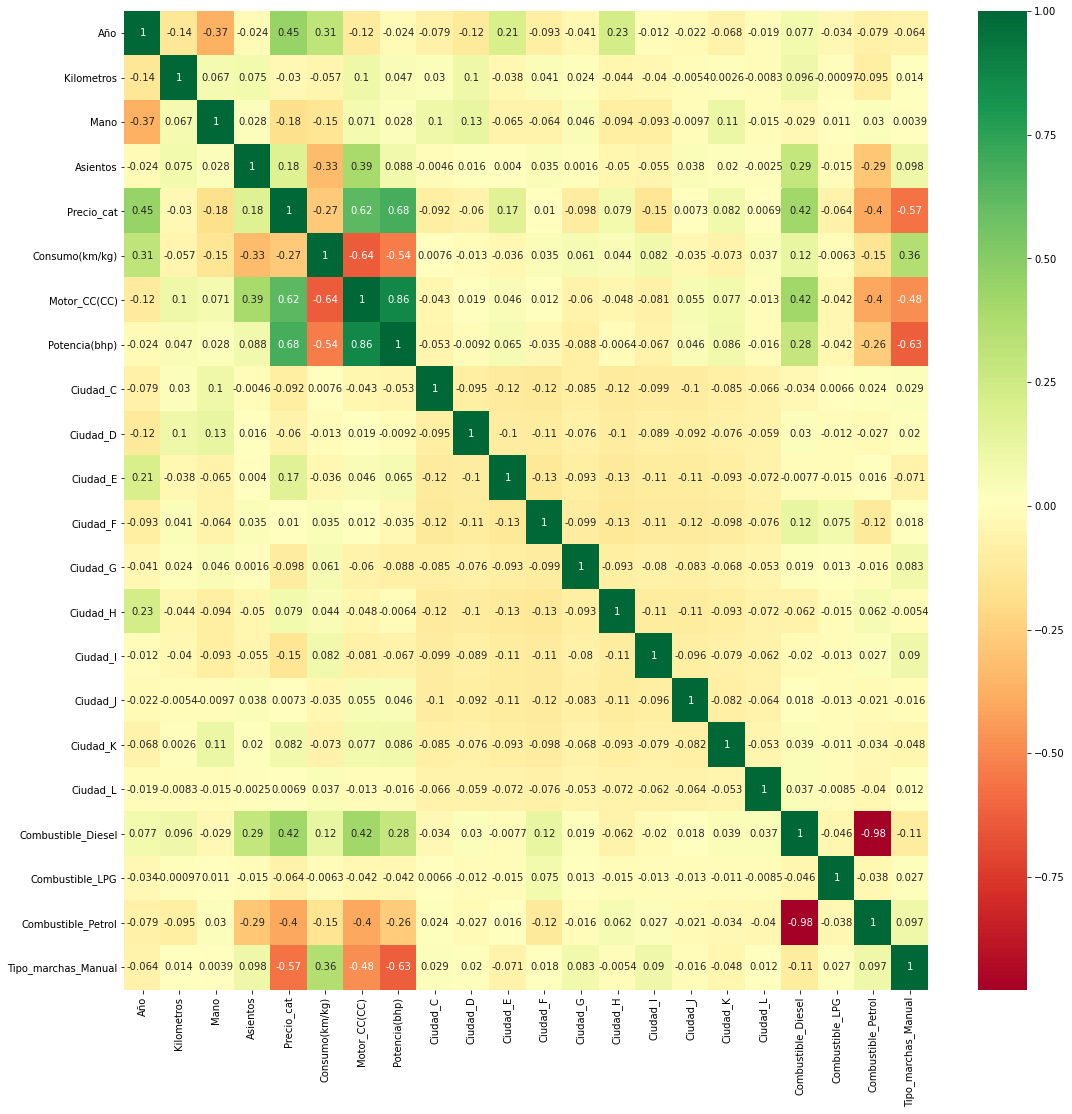

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(final_car_train_3.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [47]:
selection= ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

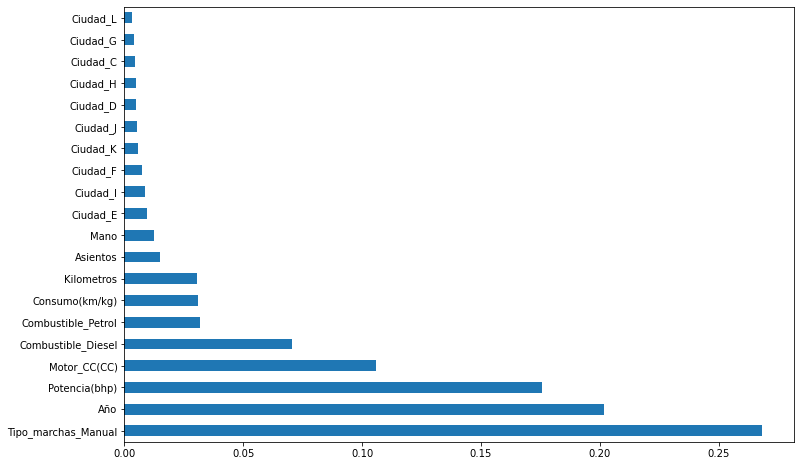

In [48]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Construir el modelo

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [53]:
rf_reg = RandomForestRegressor()
rf_reg_score = cross_val_score(rf_reg, X_train, y_train, cv=5)
print(rf_reg_score.mean(), rf_reg_score.std())

0.8438253691503773 0.009357052950954993


In [54]:
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Training set:  0.9784486188420912
Accuracy on Testing set:  0.8695152752152958


In [55]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  0.24325842696629213
Mean Squared  Error      :  0.14329950062421973
Root Mean Squared  Error :  0.37854920502389083
R Squared Error          :  0.8695152752152958


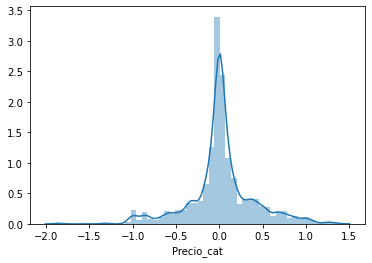

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

In [58]:
rnd_clf = RandomForestClassifier()
rnd_clf_score = cross_val_score(rnd_clf, X_train, y_train, cv=5)
print(rnd_clf_score.mean(), rnd_clf_score.std())

0.8084374999999999 0.00824431622392056


In [59]:
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)
print("Accuracy on Training set: ",rnd_clf.score(X_train,y_train))
print("Accuracy on Testing set: ",rnd_clf.score(X_test,y_test))

Accuracy on Training set:  1.0
Accuracy on Testing set:  0.8476903870162297


In [60]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('f1_score: ', f1_score(y_test, y_pred, average='micro'))
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

		Error Table
Mean Absolute Error      :  0.15480649188514356
Mean Squared  Error      :  0.15980024968789014
Root Mean Squared  Error :  0.3997502341311261
f1_score:  0.8476903870162297
accuracy_score:  0.8476903870162297
precision_score:  0.8476903870162297
recall_score:  0.8476903870162297


In [61]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [64]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [66]:
best_rnd_clf = RandomForestClassifier(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
best_rnd_clf_score = cross_val_score(best_rnd_clf, X_train, y_train, cv=5)
print(best_rnd_clf_score.mean(), best_rnd_clf_score.std())

0.8125 0.007194290270763323


In [67]:
best_rnd_clf.fit(X_train, y_train)
y_pred = best_rnd_clf.predict(X_test)
print("Accuracy on Training set: ",best_rnd_clf.score(X_train,y_train))
print("Accuracy on Testing set: ",best_rnd_clf.score(X_test,y_test))

Accuracy on Training set:  1.0
Accuracy on Testing set:  0.8414481897627965


In [68]:
print("\t\tError Table")
print('Mean Absolute Error      : ', mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('f1_score: ', f1_score(y_test, y_pred, average='micro'))
print('accuracy_score: ', accuracy_score(y_test, y_pred))
print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

		Error Table
Mean Absolute Error      :  0.16104868913857678
Mean Squared  Error      :  0.16604244694132334
Root Mean Squared  Error :  0.40748306337972295
f1_score:  0.8414481897627965
accuracy_score:  0.8414481897627965
precision_score:  0.8414481897627965
recall_score:  0.8414481897627965


## Generando fichero kaggle

In [75]:
tests_ids_3 = final_car_test_3['id']
del final_car_test_3['id']

In [76]:
predict_3 = best_rnd_clf.predict(final_car_test_3)
print(predict_3)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_3, 'Precio_cat': predict_3 })
df_result.to_csv("mis_resultados_3.csv", index=False)

[5 2 2 ... 5 5 5]
